### 随机梯度下降p_u推导 q_i同理

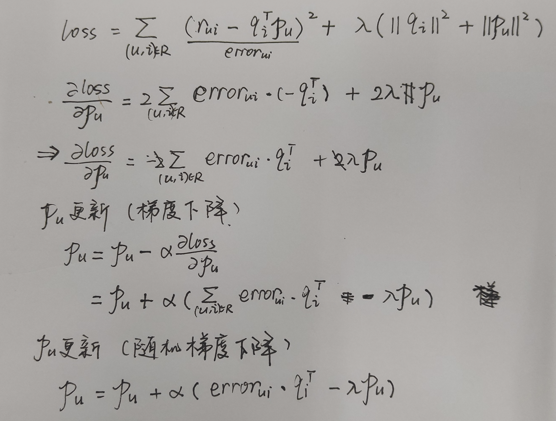

### 代码部分 demo

In [1]:
import numpy as np
import pandas as pd
dtype = {"userId":np.int32, "movieId":np.int32, "rating":np.float32}
dataset = pd.read_csv("../dataset/ml-latest-small/ratings.csv",dtype=dtype, usecols=[0,1,2])
dataset = pd.DataFrame(dataset)
dataset

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [2]:
user_ratings = dataset.groupby("userId").agg(list)
item_ratings = dataset.groupby("movieId").agg(list)

In [3]:
item_ratings

,userId,rating
movieId,,
1,"[1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, ...","[4.0, 4.0, 4.5, 2.5, 4.5, 3.5, 4.0, 3.5, 3.0, ..."
2,"[6, 8, 18, 19, 20, 21, 27, 51, 62, 68, 82, 91,...","[4.0, 4.0, 3.0, 3.0, 3.0, 3.5, 4.0, 4.5, 4.0, ..."
3,"[1, 6, 19, 32, 42, 43, 44, 51, 58, 64, 68, 91,...","[4.0, 5.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, ..."
4,"[6, 14, 84, 162, 262, 411, 600]","[3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 1.5]"
5,"[6, 31, 43, 45, 58, 66, 68, 84, 103, 107, 111,...","[5.0, 3.0, 5.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, ..."
...,...,...
193581,[184],[4.0]
193583,[184],[3.5]
193585,[184],[3.5]


In [4]:
P = dict(zip(user_ratings.index, np.random.rand(len(user_ratings.index),10).astype(np.float32)))

In [5]:
Q = dict(zip(item_ratings.index, np.random.rand(len(item_ratings.index),10).astype(np.float32)))

In [6]:
Q

{1: array([0.61120415, 0.31011954, 0.0832165 , 0.43956143, 0.35062444,
        0.91896087, 0.41249463, 0.73259896, 0.9443487 , 0.35846   ],
       dtype=float32),
 2: array([0.235806  , 0.6147522 , 0.51648647, 0.96668   , 0.58676285,
        0.4275051 , 0.06608596, 0.46707377, 0.76763684, 0.19847539],
       dtype=float32),
 3: array([0.2998608 , 0.22943659, 0.6867583 , 0.89511406, 0.89438385,
        0.03394481, 0.7232176 , 0.48137242, 0.78415495, 0.2008615 ],
       dtype=float32),
 4: array([0.13122034, 0.89404356, 0.6095793 , 0.5730461 , 0.3271158 ,
        0.13998006, 0.6378219 , 0.36928508, 0.69706565, 0.00592301],
       dtype=float32),
 5: array([0.8460183 , 0.9850703 , 0.73417425, 0.0338213 , 0.47493684,
        0.54539967, 0.7034931 , 0.6008937 , 0.44014043, 0.00863193],
       dtype=float32),
 6: array([0.525881  , 0.03698682, 0.33544585, 0.6818306 , 0.60217756,
        0.28897944, 0.57895315, 0.99838173, 0.8695089 , 0.06300584],
       dtype=float32),
 7: array([0.91096616,

In [7]:
epochs = 15
alpha = 0.02 #学习率
reg = 0.01 #正则化参数
for epoch in range(epochs):
    print("*"*5, epoch);
    for uid, iid, real_rating in dataset.itertuples(index=False):
        u_emd = P[uid]
        i_emd = Q[iid]
        error = real_rating - np.dot(u_emd, i_emd);
        u_emd += alpha*(error * i_emd - reg * u_emd)
        i_emd += alpha*(error * u_emd - reg * i_emd)
        
        P[uid] = u_emd
        Q[iid] = i_emd
        

***** 0
***** 1
***** 2
***** 3
***** 4
***** 5
***** 6
***** 7
***** 8
***** 9
***** 10
***** 11
***** 12
***** 13
***** 14


In [8]:
global_mean = dataset["rating"].sum()/dataset["rating"].count()

In [9]:
global_mean

3.501556983616962

In [10]:
def predict(uid, iid):
    if uid not in list(user_ratings.index) or iid not in list(item_ratings.index):
        return global_mean
    else:
        return np.dot(P[uid], Q[iid])

In [11]:
predict(1,5)

3.011774